In [1]:
# Generating charts with metrics
from ip_analysis_tool.visualize.chart import visualize_chart, visualize_chart_add_line
from ip_analysis_tool.outlier_filter import remove_empty_dates, z_score_filter, iqr_filter
from ip_analysis_tool.trend_identification import linear_regression
import pandas as pd

data = remove_empty_dates(pd.read_csv("../scratchpad/data_week.csv")) # Data may not be in git

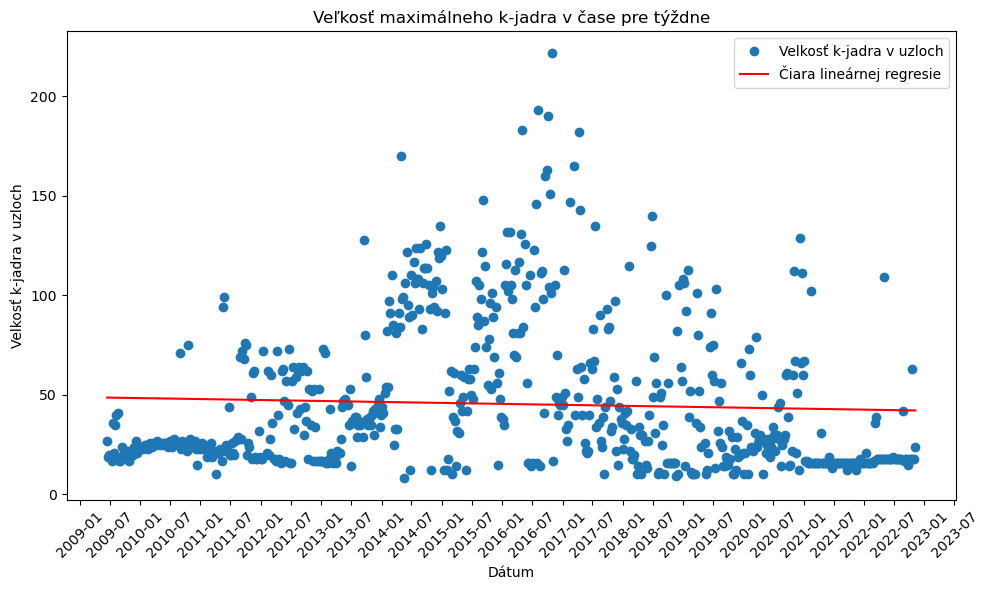

Number of entries: 691
Average max_k_core_size: 45.39942112879884
Maximum max_k_core_size: 222
Minimum max_k_core_size: 8
Standard deviation: 36.26136523022918
Median max_k_core_size: 29.0
Number of entries with max_k_core_size == 8: 1
Number of entries with max_k_core_size == 9: 1
Number of entries with max_k_core_size == 10: 17
Number of entries with max_k_core_size == 11: 2
Number of entries with max_k_core_size == 12: 10
Number of entries with max_k_core_size == 13: 3
Number of entries with max_k_core_size == 14: 10
Number of entries with max_k_core_size == 15: 7
Number of entries with max_k_core_size == 16: 67
Number of entries with max_k_core_size == 17: 19
Number of entries with max_k_core_size == 18: 44
Number of entries with max_k_core_size == 19: 13
Number of entries with max_k_core_size == 20: 14
Number of entries with max_k_core_size == 21: 17
Number of entries with max_k_core_size == 22: 14
Number of entries with max_k_core_size == 23: 13
Number of entries with max_k_core_

In [2]:
# No filter
data = linear_regression(data, "max_k_core_size")
visualize_chart_add_line(
    data=data,
    x_characteristic="date",
    y_characteristic="max_k_core_size",
    y_line_characteristic="trend",
    title="Veľkosť maximálneho k-jadra v čase pre týždne",
    x_label="Dátum",
    y_label="Velkosť k-jadra v uzloch",
    y_line_label="Čiara lineárnej regresie",
)
print("Number of entries:", len(data))
min_value = data["max_k_core_size"].min()
max_value = data["max_k_core_size"].max()
print("Average max_k_core_size:", data["max_k_core_size"].mean())
print("Maximum max_k_core_size:", max_value)
print("Minimum max_k_core_size:", min_value)
print("Standard deviation:", data["max_k_core_size"].std())
print("Median max_k_core_size:", data["max_k_core_size"].median())
for i in range(min_value, max_value + 1):
    if len(data[data["max_k_core_size"] == i]) > 0:
        print("Number of entries with max_k_core_size == {}: {}".format(i, len(data[data["max_k_core_size"] == i])))


In [3]:
# For each week print out the relevant information
for week in data["date"].unique():
    week_data = data[data["date"] == week]
    print("Week: {}, max_k_core_size: {}, max_k: {}, trend: {}".format(week, week_data["max_k_core_size"].max(), week_data["max_k_core"].max(), week_data["trend"].max()))

Week: 2009-06-15 00:00:00, max_k_core_size: 27, max_k: 8, trend: 48.63576652523636
Week: 2009-06-22 00:00:00, max_k_core_size: 19, max_k: 8, trend: 48.62650550273747
Week: 2009-06-29 00:00:00, max_k_core_size: 20, max_k: 8, trend: 48.617244480238696
Week: 2009-07-06 00:00:00, max_k_core_size: 19, max_k: 8, trend: 48.607983457739806
Week: 2009-07-13 00:00:00, max_k_core_size: 17, max_k: 8, trend: 48.598722435240916
Week: 2009-07-20 00:00:00, max_k_core_size: 36, max_k: 8, trend: 48.589461412742025
Week: 2009-07-27 00:00:00, max_k_core_size: 21, max_k: 8, trend: 48.580200390243135
Week: 2009-08-03 00:00:00, max_k_core_size: 35, max_k: 8, trend: 48.570939367744245
Week: 2009-08-10 00:00:00, max_k_core_size: 40, max_k: 8, trend: 48.561678345245355
Week: 2009-08-17 00:00:00, max_k_core_size: 41, max_k: 8, trend: 48.552417322746464
Week: 2009-08-24 00:00:00, max_k_core_size: 17, max_k: 9, trend: 48.54315630024769
Week: 2009-08-31 00:00:00, max_k_core_size: 17, max_k: 8, trend: 48.53389527774

Number of entries with max_k_core_size == 8: 14


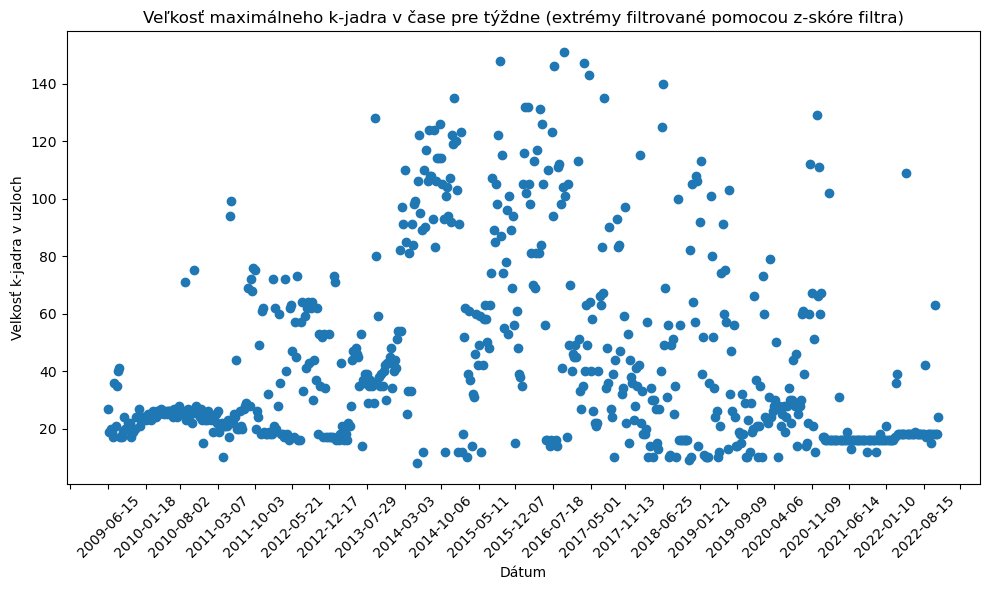

Number of entries: 682
Average max_k_core_size: 43.611436950146626
Maximum max_k_core_size: 151
Minimum max_k_core_size: 8


In [4]:
# Z-score filter
z_score_filtered_data = z_score_filter(data, "max_k_core_size")
visualize_chart(
    data=z_score_filtered_data,
    x_characteristic="date",
    y_characteristic="max_k_core_size",
    title="Veľkosť maximálneho k-jadra v čase pre týždne (extrémy filtrované pomocou z-skóre filtra)",
    x_label="Dátum",
    y_label="Velkosť k-jadra v uzloch",
)
print("Number of entries:", len(z_score_filtered_data))
print("Average max_k_core_size:", z_score_filtered_data["max_k_core_size"].mean())
print("Maximum max_k_core_size:", z_score_filtered_data["max_k_core_size"].max())
print("Minimum max_k_core_size:", z_score_filtered_data["max_k_core_size"].min())

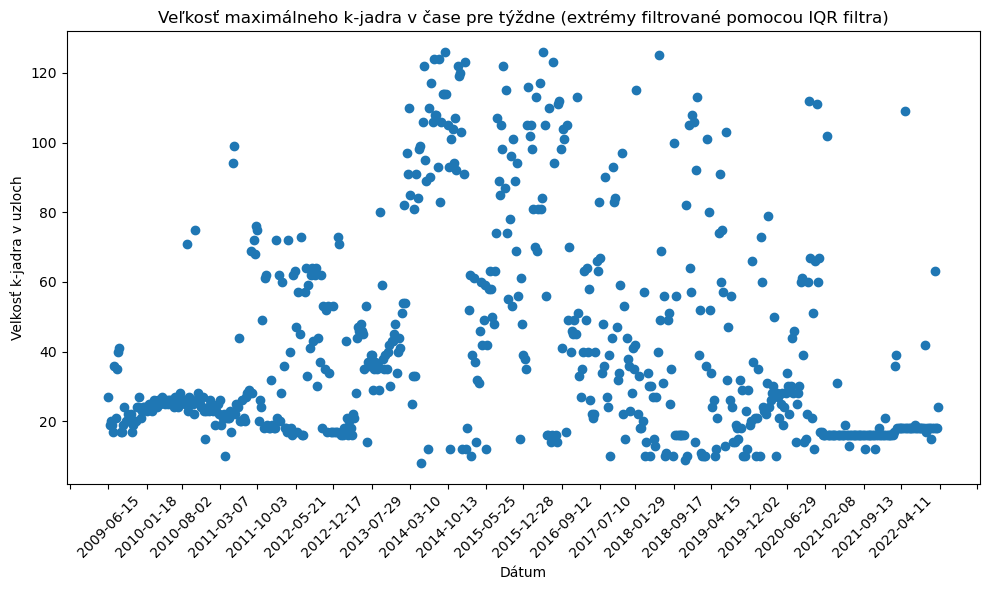

Number of entries: 669
Average max_k_core_size: 41.77279521674141
Maximum max_k_core_size: 126
Minimum max_k_core_size: 8


In [5]:
# IQR filter
iqr_filtered_data = iqr_filter(data, "max_k_core_size")
visualize_chart(
    data=iqr_filtered_data,
    x_characteristic="date",
    y_characteristic="max_k_core_size",
    title="Veľkosť maximálneho k-jadra v čase pre týždne (extrémy filtrované pomocou IQR filtra)",
    x_label="Dátum",
    y_label="Velkosť k-jadra v uzloch",
)
print("Number of entries:", len(iqr_filtered_data))
print("Average max_k_core_size:", iqr_filtered_data["max_k_core_size"].mean())
print("Maximum max_k_core_size:", iqr_filtered_data["max_k_core_size"].max())
print("Minimum max_k_core_size:", iqr_filtered_data["max_k_core_size"].min())

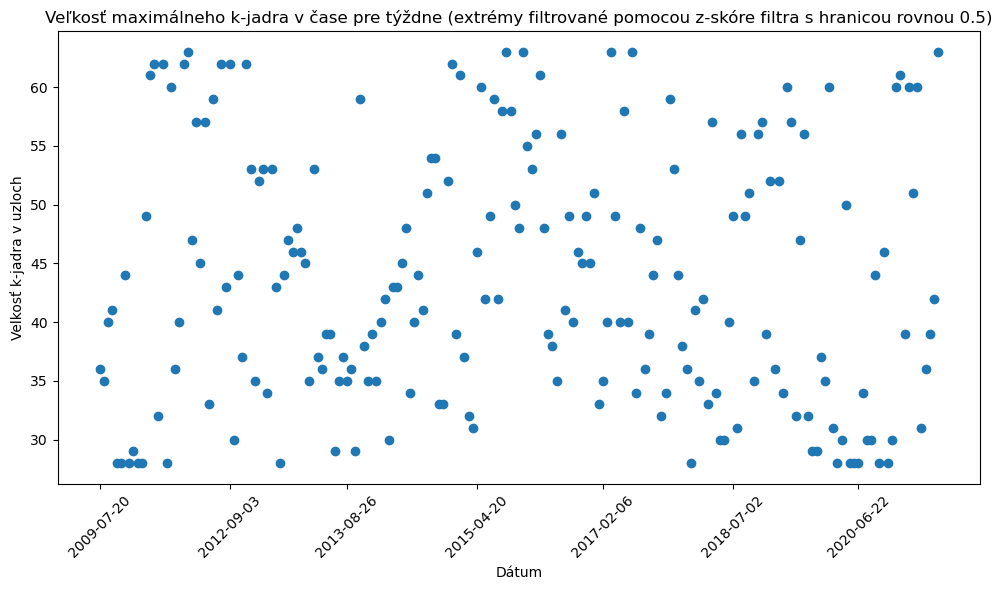

Number of entries: 201
Average max_k_core_size: 43.517412935323385
Maximum max_k_core_size: 63
Minimum max_k_core_size: 28


In [8]:
# Z-score filter with z=0.5
z_score_filtered_data = z_score_filter(data, "max_k_core_size", .5)
visualize_chart(
    data=z_score_filtered_data,
    x_characteristic="date",
    y_characteristic="max_k_core_size",
    title="Veľkosť maximálneho k-jadra v čase pre týždne (extrémy filtrované pomocou z-skóre filtra s hranicou rovnou 0.5)",
    x_label="Dátum",
    y_label="Velkosť k-jadra v uzloch",
)
print("Number of entries:", len(z_score_filtered_data))
print("Average max_k_core_size:", z_score_filtered_data["max_k_core_size"].mean())
print("Maximum max_k_core_size:", z_score_filtered_data["max_k_core_size"].max())
print("Minimum max_k_core_size:", z_score_filtered_data["max_k_core_size"].min())

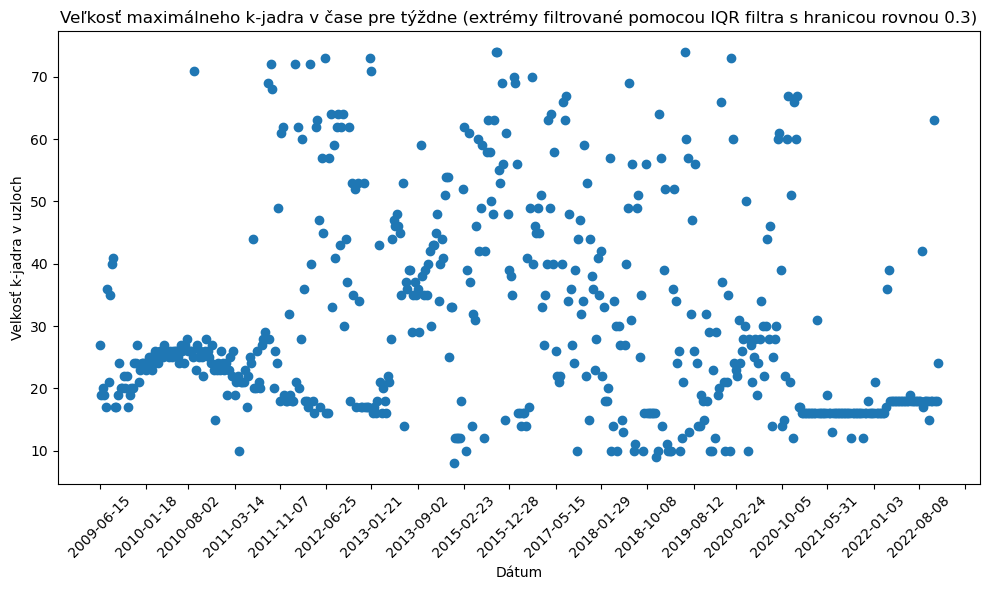

Number of entries: 560
Average max_k_core_size: 30.385714285714286
Maximum max_k_core_size: 74
Minimum max_k_core_size: 8


In [16]:
# IQR filter with threshold=0.3
iqr_filtered_data = iqr_filter(data, "max_k_core_size", .3)

visualize_chart(
    data=iqr_filtered_data,
    x_characteristic="date",
    y_characteristic="max_k_core_size",
    title="Veľkosť maximálneho k-jadra v čase pre týždne (extrémy filtrované pomocou IQR filtra s hranicou rovnou 0.3)",
    x_label="Dátum",
    y_label="Velkosť k-jadra v uzloch",
)
print("Number of entries:", len(iqr_filtered_data))
print("Average max_k_core_size:", iqr_filtered_data["max_k_core_size"].mean())
print("Maximum max_k_core_size:", iqr_filtered_data["max_k_core_size"].max())
print("Minimum max_k_core_size:", iqr_filtered_data["max_k_core_size"].min())

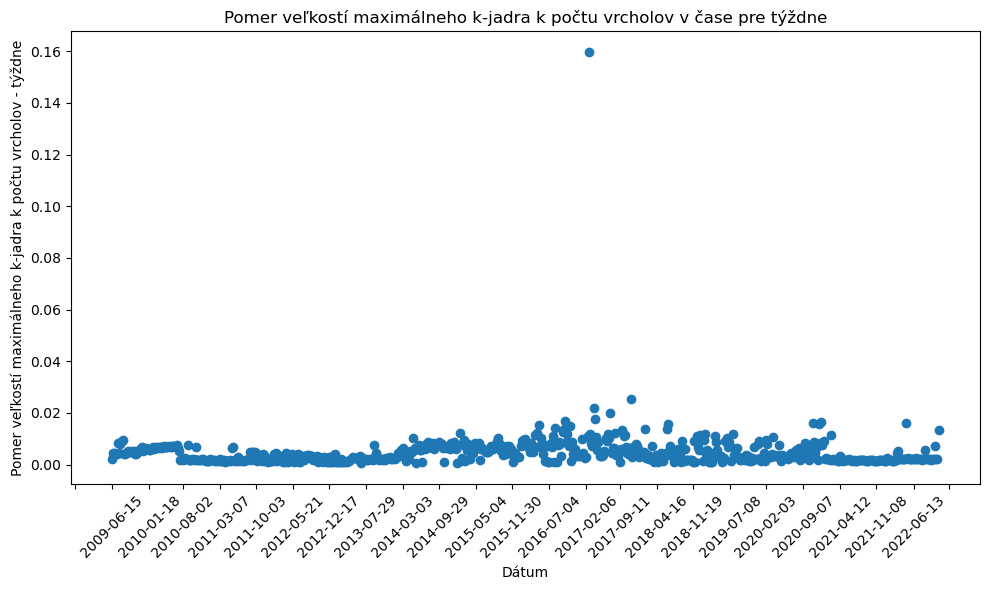

Average ratio: 0.004625012247453949
Maximum ratio: 0.15972894482090996
Minimum ratio: 0.0005281225244256667
Standard deviation: 0.006814157491231483

Now, extreme value removed


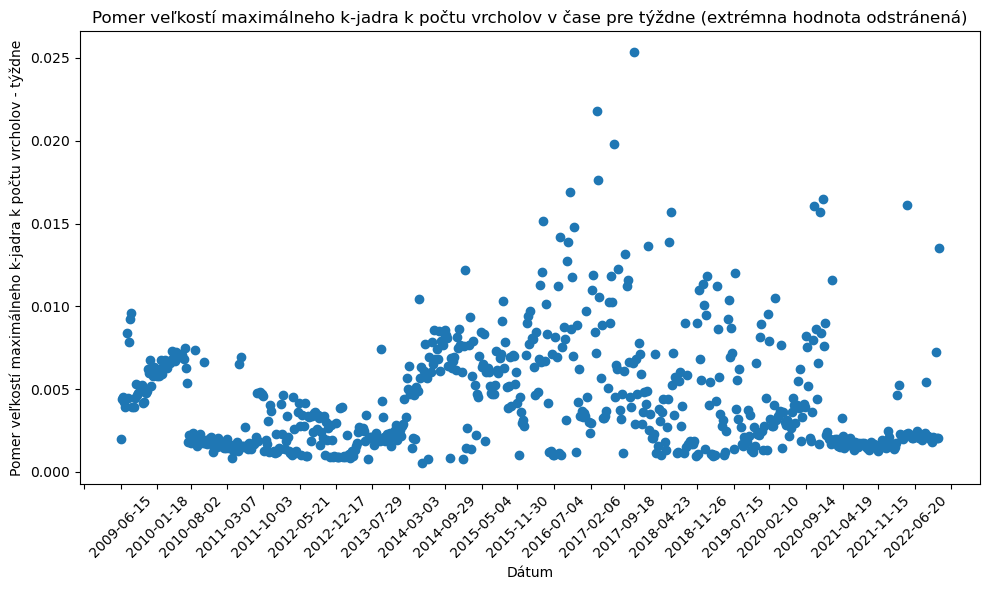

Average ratio: 0.004400223939376477
Maximum ratio: 0.02536610878661088
Minimum ratio: 0.0005281225244256667
Standard deviation: 0.003396082594935895


In [22]:
# Correlation between max_k_core_size and num_vertices
data_with_ratio = data.copy()
data_with_ratio["max_k_core_size_ratio"] = data_with_ratio["max_k_core_size"] / data_with_ratio["num_vertices"]
visualize_chart(
    data=data_with_ratio,
    x_characteristic="date",
    y_characteristic="max_k_core_size_ratio",
    title="Pomer veľkostí maximálneho k-jadra k počtu vrcholov v čase pre týždne",
    x_label="Dátum",
    y_label="Pomer veľkostí maximálneho k-jadra k počtu vrcholov - týždne",
)
print("Average ratio:", data_with_ratio["max_k_core_size_ratio"].mean())
print("Maximum ratio:", data_with_ratio["max_k_core_size_ratio"].max())
print("Minimum ratio:", data_with_ratio["max_k_core_size_ratio"].min())
print("Standard deviation:", data_with_ratio["max_k_core_size_ratio"].std())

# Remove the max value
data_with_ratio = data_with_ratio[data_with_ratio["max_k_core_size_ratio"] != data_with_ratio["max_k_core_size_ratio"].max()]
print("\nNow, extreme value removed")
visualize_chart(
    data=data_with_ratio,
    x_characteristic="date",
    y_characteristic="max_k_core_size_ratio",
    title="Pomer veľkostí maximálneho k-jadra k počtu vrcholov v čase pre týždne (extrémna hodnota odstránená)",
    x_label="Dátum",
    y_label="Pomer veľkostí maximálneho k-jadra k počtu vrcholov - týždne",
)
print("Average ratio:", data_with_ratio["max_k_core_size_ratio"].mean())
print("Maximum ratio:", data_with_ratio["max_k_core_size_ratio"].max())
print("Minimum ratio:", data_with_ratio["max_k_core_size_ratio"].min())
print("Standard deviation:", data_with_ratio["max_k_core_size_ratio"].std())